# Milestone P2

[Milestone P2 briefing](https://epfl-ada.github.io/teaching/fall2023/cs401/projects/#p2-project-proposal-and-initial-analyses)

Goals: acquaint ourselves with the data, preprocess the data, complete all the necessary descriptive statistics tasks

Should contain (non-exhaustive):
- That you can handle the data in its size.
- That you understand what’s in the data (formats, distributions, missing values, correlations, etc.).
- That you considered ways to enrich, filter, transform the data according to your needs.
- That you have a reasonable plan and ideas for methods you’re going to use, giving their essential mathematical details in the notebook.
- That your plan for analysis and communication is reasonable and sound, potentially discussing alternatives to your choices that you considered but dropped.
... initial analyses and data handling pipelines.

Grade: correctness, quality of code, and quality of textual descriptions
(20% of the project grade)

## Configuration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from implementations import data_viz, data_missing, data_format, data_clean, data_filter

In [2]:
# Data Path
DATA_PATH = '../data/'
MOVIES_FOLDER = DATA_PATH+'MovieSummaries/'
MOVIES_DATASET = MOVIES_FOLDER+"movie.metadata.tsv"

# Load Data
df = pd.read_csv(MOVIES_DATASET, sep='\t', names=['id_wiki','id_freebase','name','date',
                                                  'box_office','runtime','lang','countries','genres'])

## What's in the data?
Description and visualization of the data:
- data type, formats (explain type for each feature)
- distributions
- missing values
- correlation
- ... ?

Size Movies 81741


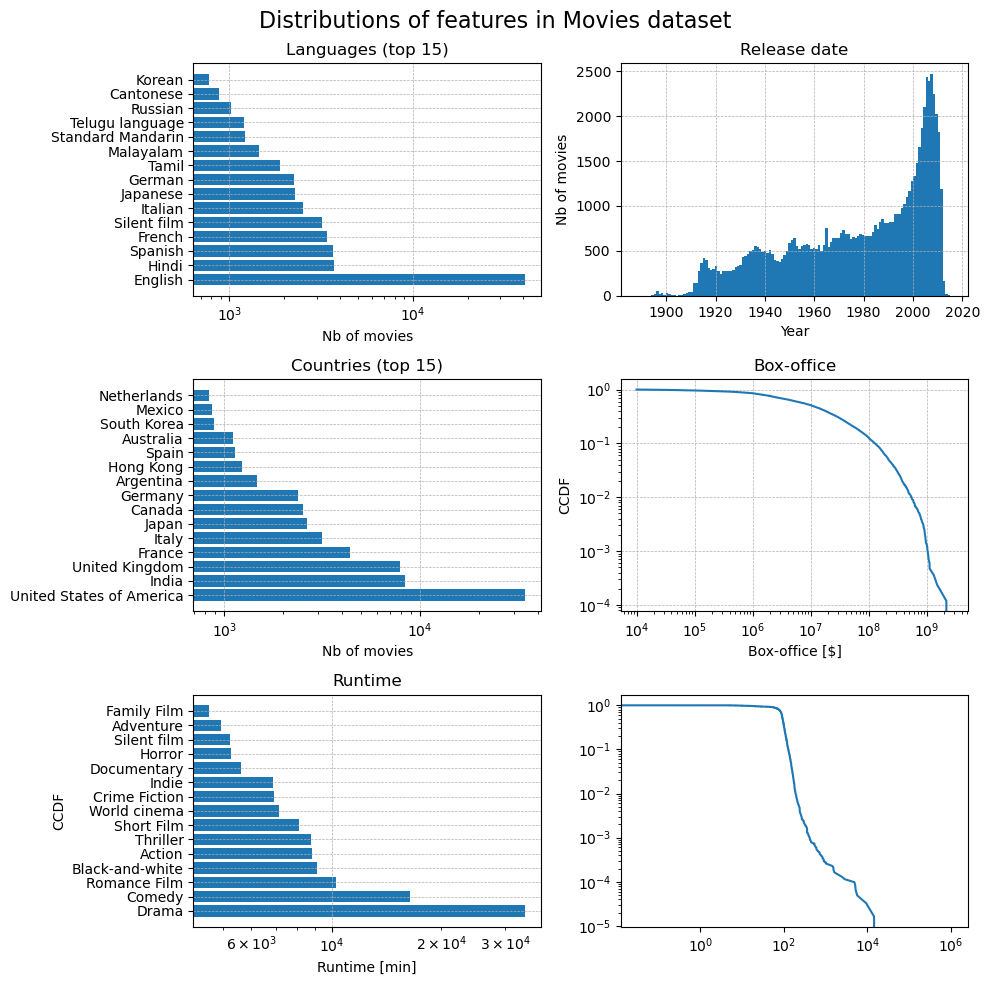

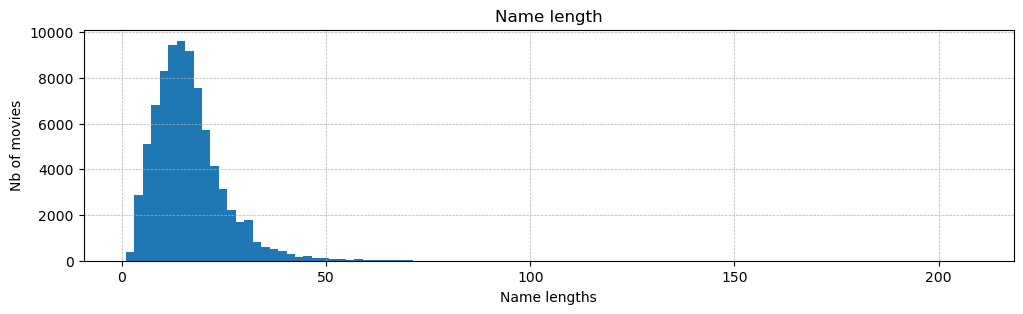

In [3]:
print("Size Movies", len(df))
data_viz(df, israw=True)

## Enrich Data
- filter
- transform data according to our needs
- new datasets

How data description changed from raw data ?

In [4]:
movies = df.copy()

# Handle missing values
movies = data_missing(movies)

# Format data types
movies = data_format(movies)

# Clean data, outliers and features
movies = data_clean(movies)

# Filter data
movies = data_filter(movies)

Size Movies (pre-processed) 6778


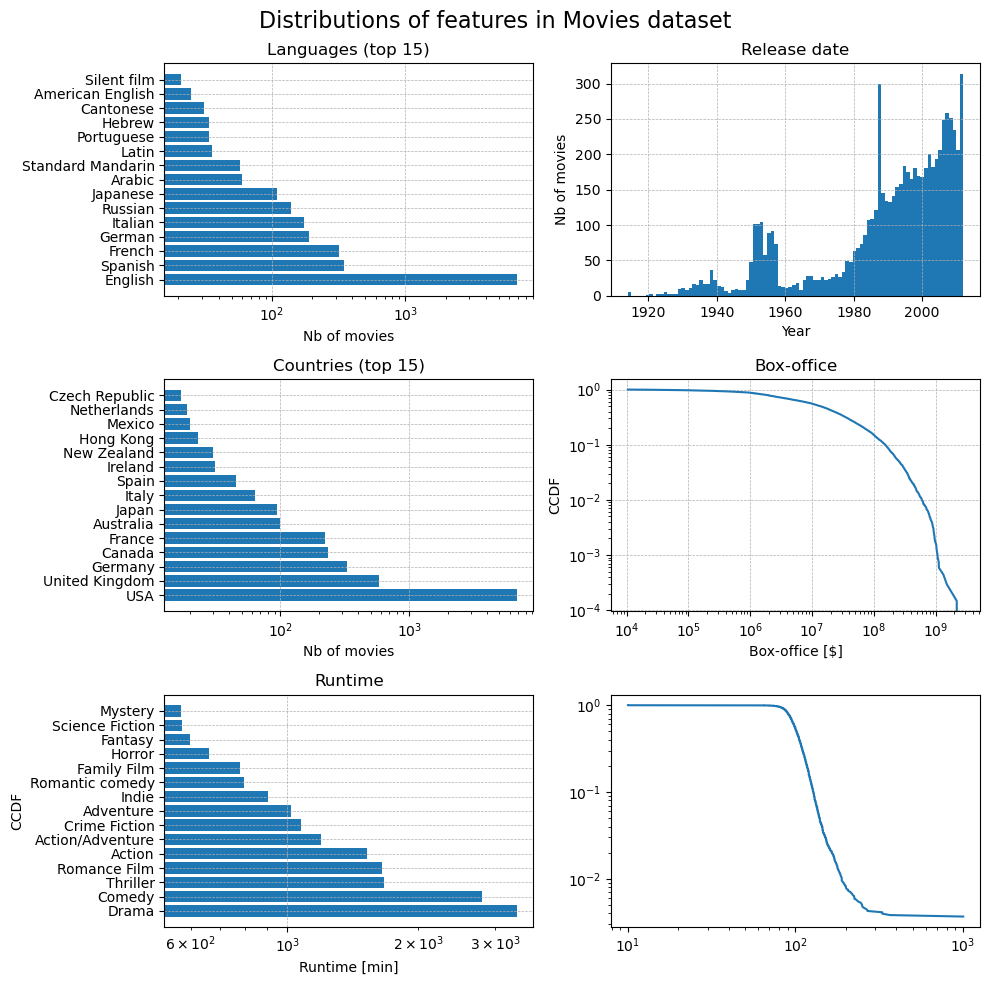

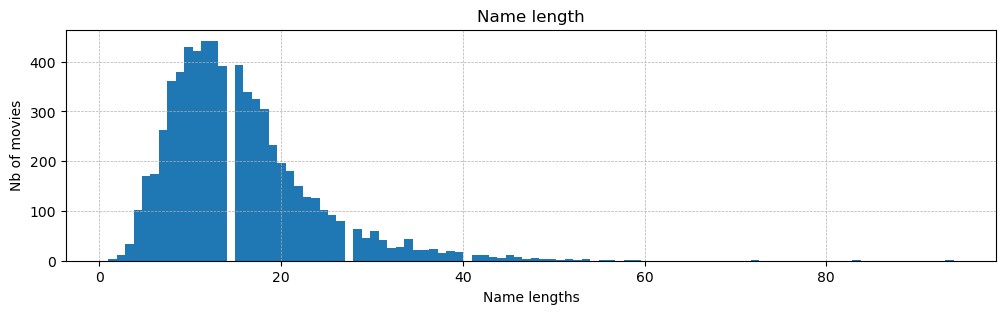

In [5]:
print("Size Movies (pre-processed)", len(movies))
data_viz(movies)

## Pipeline
Our ideas and structure to solve the problem. Reasonable plan, discuss alternatives, dropped ideas.

1. Plot subsets (genres, etc.)
2. Range prior to a trend peak
3. Algo for pivotal movie (box-office, reviews, summary similarites)

In [6]:
from implementations import ax_settings, create_subset

Example: Teen movies

Size subset (Teen) 6778


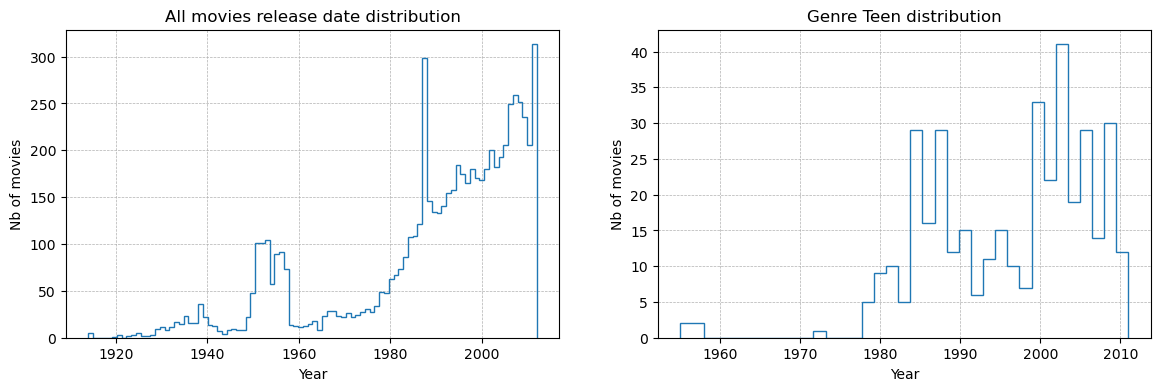

In [9]:
# Create a subset to compare to the whole dataset (here: Teen Movies)
key = 'Teen'
subset = create_subset(movies, key)
print("Size subset ({}) {}".format(key, len(movies)))

# Plot release dates distribution
fig, axs = plt.subplots(1, 2, figsize=(14,4))
axs = axs.ravel()

movies.date.hist(bins=movies.date.nunique(), ax=axs[0], histtype='step')
ax_settings(axs[0], xlabel='Year', ylabel='Nb of movies', title='All movies release date distribution')

subset.date.hist(bins=subset.date.nunique(), ax=axs[1], histtype='step')
ax_settings(axs[1], xlabel='Year', ylabel='Nb of movies', title='Genre {} distribution'.format(key))

This is an early version of the analysis, so not everything has been implemented yet. Here we simply plot the number of movies distribution, but we plan to use the fraction of (subset) movies distribution later for more robust results. However, this already gives us an idea of what we could expect from the data.

We display two graphs above. The left plot is the distribution of movie releases over time. The right plot shows the evolution of number of movies releases over time, of the genre "Teen movie". We immediately notice several elements. First the shapes of the two curves are markedly different, this confirms us that we choose an interesting subset for analysis, since it differs from the baseline. Now by looking more closely, we see that the genre Teen emerged at a certain point in cinema, because (almost) no data exists before late 70's, and we have no record before late 50's. This is very indicating about the existence of a trend ! But we can extract more, we significantly see two bumps in the Teen plot centered around two different decades. Without going much further here, we can already assume that pivotal movies are hiding here...